# **Data Cleaning**

## **6. Handling Outliers (Detection & Treatment)**

In [1]:
import numpy as np
import pandas as pd 

## 🔍 What are Outliers?

Outliers are **data points that significantly differ** from the rest of the dataset. They can:

* Skew mean-based statistics
* Distort model predictions
* Indicate **data entry errors**, **fraud**, or **genuine rare events**


### ✅ Real-Life Examples of Outliers

| Domain     | Variable    | Outlier Example                            |
| ---------- | ----------- | ------------------------------------------ |
| Banking    | Salary      | ₹10,000,000 (CEO in general staff dataset) |
| Healthcare | Heart Rate  | 250 BPM                                    |
| Ecommerce  | Order Value | ₹0 or ₹500,000                             |
| Education  | Marks       | 110% (invalid)                             |


In [2]:
df = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4, 5, 6, 7],
    'PurchaseAmount': [500, 520, 510, 490, 515, 8000, 495]
})

df

,CustomerID,PurchaseAmount
0,1,500
1,2,520
2,3,510
3,4,490
4,5,515
5,6,8000
6,7,495


## 🔎 DETECTING OUTLIERS

### 🔹 **1. Using Basic Statistics (Min/Max/Mean)**

In [3]:
df['PurchaseAmount'].describe()

count       7.000000
mean     1575.714286
std      2832.864317
min       490.000000
25%       497.500000
50%       510.000000
75%       517.500000
max      8000.000000
Name: PurchaseAmount, dtype: float64

In [4]:
df['PurchaseAmount'].median()

510.0

#### ✅ Use Case:

Quick overview of possible **extreme values** based on summary stats.

🔹 *Why?*
Gives a quick visual clue to spot **suspiciously large or small values**.

### 🔹 **2. Using Standard Deviation (Z-score Method)**

In [5]:
mean = df['PurchaseAmount'].mean()
std = df['PurchaseAmount'].std()
z_score = (df['PurchaseAmount'] - mean) / std
df[z_score.abs() > 3]

,CustomerID,PurchaseAmount


Detect customers with **unusually high spend** relative to average in marketing analysis.

🔹 *Why?*
Best when data is **normally distributed**.

### 🔹 **3. Using IQR (Interquartile Range Method)**

In [6]:
Q1 = df['PurchaseAmount'].quantile(0.25)
Q3 = df['PurchaseAmount'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

df[(df['PurchaseAmount'] < lower_bound) | (df['PurchaseAmount'] > upper_bound)]

Lower Bound: 467.5
Upper Bound: 547.5


,CustomerID,PurchaseAmount
5,6,8000


#### ✅ Use Case:

Robust to skewed data — commonly used in **financial and ecommerce transactions**.

🔹 *Why?*
Less sensitive to **non-normal distributions**.

### 🔹 **4. Visual Detection**

In [7]:
df

,CustomerID,PurchaseAmount
0,1,500
1,2,520
2,3,510
3,4,490
4,5,515
5,6,8000
6,7,495


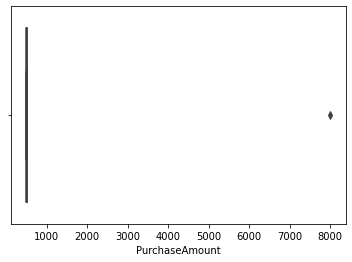

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['PurchaseAmount'])
plt.show()

#### ✅ Use Case:

In **exploratory data analysis (EDA)** to visually spot anomalies in one or more columns.

🔹 *Why?*
Quick and intuitive for **visual communication** of outliers.

## 🛠️ TREATING OUTLIERS


### 🔸 **1. Remove Outliers**

In [9]:
df[(df['PurchaseAmount'] >= lower_bound) & (df['PurchaseAmount'] <= upper_bound)]

,CustomerID,PurchaseAmount
0,1,500
1,2,520
2,3,510
3,4,490
4,5,515
6,7,495


#### ✅ Use Case:

In **ML training**, outliers might degrade model performance. Remove when not meaningful.

🔹 *Why?*
Best when outliers are **data entry errors** or **not important**.

### 🔸 **2. Cap / Winsorize Outliers**

In [10]:
print(f"Lower bond: {lower_bound}")
print(f"Upper bound: {upper_bound}")

Lower bond: 467.5
Upper bound: 547.5


In [11]:
df['PurchaseAmount_'] = np.clip(df['PurchaseAmount'], lower_bound, upper_bound)
df

,CustomerID,PurchaseAmount,PurchaseAmount_
0,1,500,500.0
1,2,520,520.0
2,3,510,510.0
3,4,490,490.0
4,5,515,515.0
5,6,8000,547.5
6,7,495,495.0


#### ✅ Use Case:

In **credit scoring**, you want to reduce influence of extreme values without losing records.

🔹 *Why?*
Keeps the data but **limits the impact** of extreme values.

### 🔸 **3. Impute with Mean / Median**

In [12]:
df

,CustomerID,PurchaseAmount,PurchaseAmount_
0,1,500,500.0
1,2,520,520.0
2,3,510,510.0
3,4,490,490.0
4,5,515,515.0
5,6,8000,547.5
6,7,495,495.0


In [28]:
df['PurchaseAmountCopy1'] = df['PurchaseAmount'].copy()

In [29]:
outliers = (df['PurchaseAmountCopy1'] > upper_bound) | (df['PurchaseAmountCopy1'] < lower_bound)
df.loc[outliers, 'PurchaseAmountCopy1'] = df['PurchaseAmountCopy1'].mean().astype(int)

df

,CustomerID,PurchaseAmount,PurchaseAmount_,PurchaseAmountCopy1
0,1,500,500.0,500
1,2,520,520.0,520
2,3,510,510.0,510
3,4,490,490.0,490
4,5,515,515.0,515
5,6,8000,547.5,1575
6,7,495,495.0,495


#### ✅ Use Case:

In **sensor readings**, replace outlier spikes with median value to maintain continuity.

🔹 *Why?*
Preserves record while **smoothing out extremes**.

### 🔸 **4. Flag Outliers for Modeling**

In [31]:
df['is_outlier'] = ((df['PurchaseAmount'] < lower_bound) | (df['PurchaseAmount'] > upper_bound)).astype(int)

df

,CustomerID,PurchaseAmount,PurchaseAmount_,PurchaseAmountCopy1,is_outlier
0,1,500,500.0,500,0
1,2,520,520.0,520,0
2,3,510,510.0,510,0
3,4,490,490.0,490,0
4,5,515,515.0,515,0
5,6,8000,547.5,1575,1
6,7,495,495.0,495,0


#### ✅ Use Case:

In fraud detection, a transaction marked as outlier might still be a valid but **important signal**.

🔹 *Why?*
Preserves all data while allowing the model to **learn from anomalies**.

### 🔸 **5. Use Domain Thresholds**

In [32]:
df[df['PurchaseAmount'] <= 10000]  # based on business rule

,CustomerID,PurchaseAmount,PurchaseAmount_,PurchaseAmountCopy1,is_outlier
0,1,500,500.0,500,0
1,2,520,520.0,520,0
2,3,510,510.0,510,0
3,4,490,490.0,490,0
4,5,515,515.0,515,0
5,6,8000,547.5,1575,1
6,7,495,495.0,495,0


#### ✅ Use Case:

In healthcare, heart rate > 200 BPM is **clinically impossible** — remove based on domain knowledge.

🔹 *Why?*
Most reliable when domain **rules are known**.

## 📌 Summary Table

| Technique           | When to Use                  | Real-World Example                       |
| ------------------- | ---------------------------- | ---------------------------------------- |
| `describe()`        | Get a feel for min/max/mean  | Spot unusually high sales                |
| Z-score             | Normal data, large dataset   | Flag customers with 3+ std dev purchases |
| IQR                 | Skewed data or small dataset | Remove top 1% transactions               |
| `boxplot()`         | Visual spotting              | Compare outliers across regions          |
| Remove              | Model training, entry errors | Drop age=999 or income=0                 |
| Cap / Clip          | Keep values in range         | Winsorize salary data                    |
| Replace with Median | Maintain continuity          | Smooth sensor spikes                     |
| Flag as Outlier     | Model can learn the signal   | Fraud prediction                         |
| Domain Rules        | Based on expertise           | Max heart rate ≤ 220 - age               |


### 🧠 Best Practices

* Never treat outliers blindly — **understand the business meaning first**.
* Always **visualize** before removing or capping.
* In modeling pipelines, **prefer flagging** over removing when unsure.
* Use `IQR` or **domain rules** if data is skewed.


<center><b>Thanks</b></center>